# Actividad Guiada 2 : Práctica Descenso del Gradiente
##### https://github.com/ljham/03MIAR_ALG_OPTZ.git
# Luis Jama Tello

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

### __1. Minimizar la siguiente función :__
$$
f(x) = x^2+y^2
$$


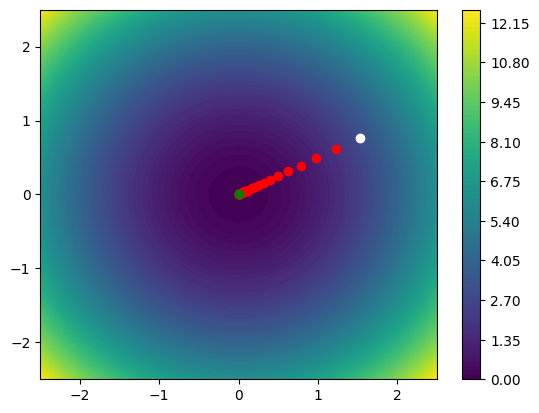

Solucion :  [3.1108914095110985e-10, 1.5510307593261754e-10] 1.2083341778145882e-19


In [6]:
f  = lambda X: X[0]**2+X[1]**2 # Funcion
df = lambda X: [2*X[0],2*X[1]] # Gradiente

# Prepara los datos para dibujar mapa de niveles Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix, iy] = f([x, y])

# Pinta el mapa de niveles z
contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c = "white")

TA = 0.10

for _ in range(100):
    grad = df(P)
    P[0], P[1] = P[0]-TA*grad[0], P[1]-TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
plt.show()
print('Solucion : ', P, f(P))



#### __Ajustar tasa de aprendizaje al gradiente__

Para ajustar la tasa de aprendizaje de forma dinámica durante el descenso del gradiente podemos utilizar la técnica del ___decaimiento de la tasa de aprendizaje___ la cual consiste en reducir gradualmente la tasa de aprendizaje a medida que se avanza en las iteraciones del descenso del gradiente. Esto puede ayudar a evitar que el algoritmo "__salte__" el minímo local y permitir un ajuste más preciso hacia el mínimo global.

#### Definición :
Se puede utilizar una tasa de aprendizaje que disminuya linealmente con el número de iteraciones, como :

$$
TA = \frac{TAO}{1 + decay\_rate * iteration}
$$

En donde __TAO__ es la tasa de aprendizaje inicial y __decay_rate__ es un factor de decaimiento.

Solucion :  [2.012649212834435e-09, 3.82902352150954e-09] 1.871217798219639e-17


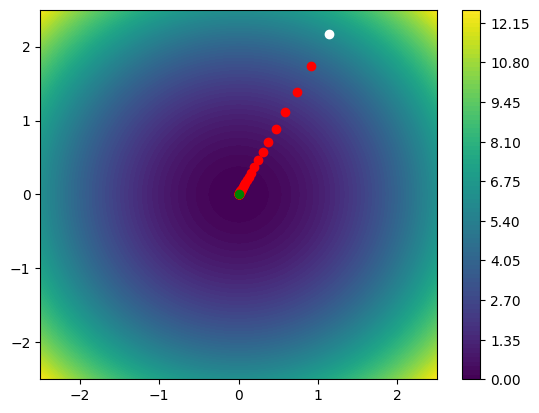

In [9]:
f = lambda X: X[0]**2 + X[1]**2  # Función
df = lambda X: [2*X[0], 2*X[1]]  # Gradiente

# Preparar los datos para dibujar mapa de niveles Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix, iy] = f([x, y])

# Pintar el mapa de niveles Z
contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="white")

TA0 = 0.10  # Tasa de aprendizaje inicial
decay_rate = 0.002  # Factor de decaimiento

for i in range(100):
    grad = df(P)
    TA = TA0 / (1 + decay_rate * i)  # Tasa de aprendizaje ajustada
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print('Solucion : ', P, f(P))

plt.show()

### __2. Minimizar la siguiente función :__
$$
f(x) = sin(\frac{1}{2}*x^{2} - \frac{1}{4}*y^{2} + 3) * cos(2*x+1-e^{y})
$$

- Ajustar la tasa de aprendizaje
- Agregar un criterio de parada



Solucion :  [-0.8682640729828004, -0.6080392030077408] -0.04070914058926845


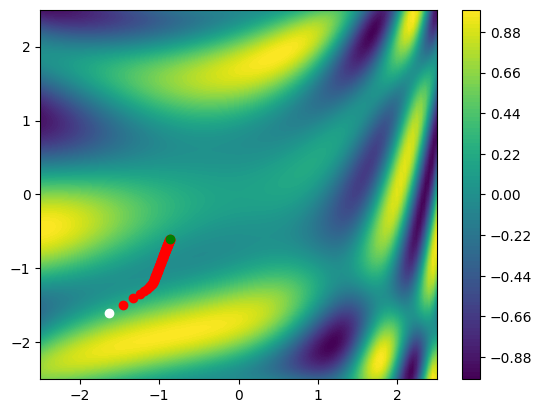

In [16]:
f = lambda X: np.sin(1/2*X[0]**2 - 1/4*X[1]**2 + 3) * np.cos(2*X[0] + 1 - np.exp(X[1]))  # Función
# df = lambda X: [X[0]*np.cos(0.5*X[0]**2 - 0.25*X[1]**2 + 3)*np.cos(2*X[0] + 1 - np.exp(X[1])),
#                 -0.5*X[1]*np.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3)*np.cos(2*X[0] + 1 - np.exp(X[1]))]  # Gradiente

def df(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    gradi = np.zeros(2)

    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        gradi[it] = (f(T) - f(PUNTO)) / h 
    return gradi


# Preparar los datos para dibujar mapa de niveles Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix, iy] = f([x, y])

# Pintar el mapa de niveles Z
contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="white")

TA0 = 0.1  # Tasa de aprendizaje inicial
decay_rate = 0.001  # Factor de decaimiento

# Criterio de parada
threshold = 1e-6  # Umbral de cambio absoluto en el valor de la función
prev_f_value = f(P)  # Valor de la función en la iteración anterior

for i in range(100):
    grad = df(P)
    TA = TA0 / (1 + decay_rate * i)  # Tasa de aprendizaje ajustada
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

    curr_f_value = f(P)  # Valor de la función en la iteración actual
    delta_f = abs(curr_f_value - prev_f_value)  # Cambio absoluto en el valor de la función

    if delta_f < threshold:
        break  # Detener el bucle si se alcanza la convergencia

    prev_f_value = curr_f_value


plt.plot(P[0], P[1], "o", c="green")
print('Solucion : ', P, f(P))

plt.show()

Con este criterio de parada, el bucle de iteraciones se detendrá cuando el cambio absoluto en el valor de la función entre iteraciones sea menor que el umbral establecido. Esto permite que el algoritmo converja más rápido y evita que se realicen más iteraciones innecesarias una vez que se alcanza una solución cercana al mínimo global.